any mental illness 2008-2020
reference: DT-repression by Dr.James Hickman

In [4]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../../data/cleaned data/Any Mental Illness 2008-2020.csv')

In [23]:
df

,18-25,26-49,50+,Male,Female,Not Hispanic or Latino,White,Black or African American,Asian,Two or More Races,Hispanic or Latino,Northeast Region,Midwest Region,South Region,West Region,Large Metro Resident,Small Metro Resident,Non Metro Resident,Urbanized,Less Urbanized
0,6099,20697,13030,14778,25048,34971,28286,4314,1300,666,4855,7865,9075,13905,8980,21077,12622,6127,2554,2997
1,6043,21455,13698,15614,25581,36321,29799,4113,1287,757,4874,7587,9169,14604,9835,21986,13011,6198,2418,3222
2,6151,20648,14618,16461,24956,36580,29704,4520,1425,584,4837,7890,9369,14656,9502,21967,13151,6299,2500,3155
3,6356,19936,15089,15895,25486,36793,29552,4364,1473,847,4589,6966,9020,15362,10033,21234,13905,6243,2589,3170
4,6774,20777,16163,16856,26858,38049,30066,5044,1608,709,5665,7723,9173,16282,10536,23221,14040,6452,2646,3191
5,6754,21061,16031,16452,27394,37828,30222,4688,1489,995,6018,7701,9461,16014,10670,23763,13492,6591,2976,3047
6,7014,20007,16531,16371,27182,37795,30074,4603,1653,989,5758,7666,9436,15877,10573,23371,13260,6922,2975,3260
7,7574,20589,15257,16785,26636,37919,30387,4410,1620,1142,5502,7706,9167,16273,10275,23474,13832,6114,2666,2731
8,7635,20903,16114,17142,27510,38598,31266,4171,1602,1061,6053,7910,8934,16638,11169,24038,14068,6546,2461,3491
9,8849,22256,15527,18065,28567,40603,32183,4782,2000,1198,6028,7920,10230,16847,11634,25223,14626,6782,2973,3214


In [27]:
X = df.drop('Large Metro Resident',axis=1)
y = df['Large Metro Resident']
X = X.to_numpy()
y = y.to_numpy()
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [28]:
#NORMALIZE 
X=0.1+(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
y=0.1+(y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))

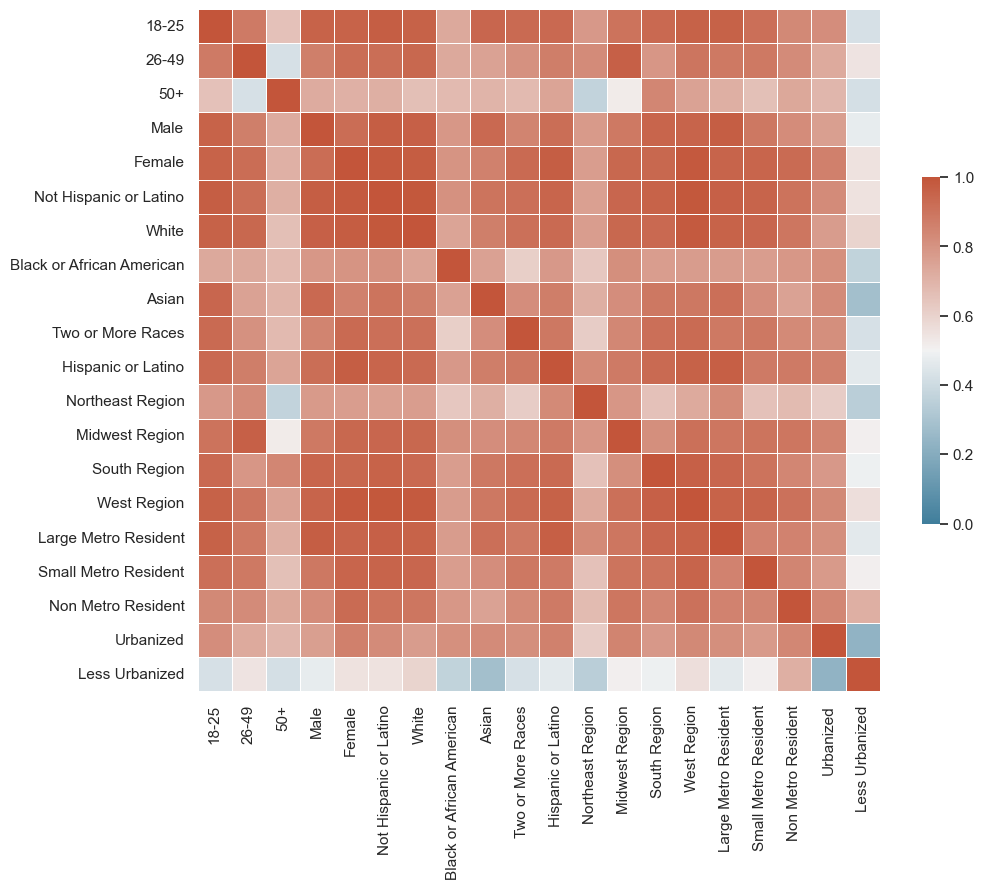

In [29]:
corr = df.corr()
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=0, vmax=1, center=0.5,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [30]:
### Partition data

from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (10, 19)
y_train.shape		: (10,)
X_test.shape		: (3, 19)
y_test.shape		: (3,)


In [31]:
#### Hyper-Parameter tuning (max_depth)

* Goal: Find the optimal hyper parameter

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
hyper_param=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,40):
    # INITIALIZE MODEL 
    model = DecisionTreeRegressor(max_depth=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i==1 or i%10==0):
        print("hyperparam =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

hyperparam = 1
 train error: 0.11718255605998071
 test error: 0.30533009278366274
hyperparam = 10
 train error: 0.0
 test error: 0.12000733709359383
hyperparam = 20
 train error: 0.0
 test error: 0.0815334525611043
hyperparam = 30
 train error: 0.0
 test error: 0.10739670747924983


2 0.04223414499931215 0.1476742941868819


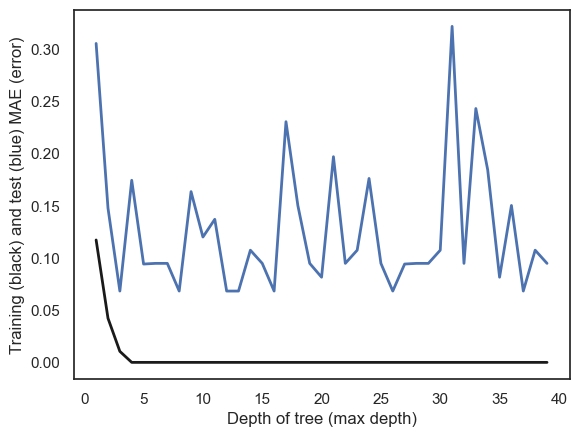

In [33]:
### Convergence plot
plt.plot(hyper_param,train_error ,linewidth=2, color='k')
plt.plot(hyper_param,test_error ,linewidth=2, color='b')

plt.xlabel("Depth of tree (max depth)")
plt.ylabel("Training (black) and test (blue) MAE (error)")

i=1
print(hyper_param[i],train_error[i],test_error[i])

In [34]:
#### Hyper-Parameter tuning (min_samples_splitint)

#* Goal: Find the optimal hyper parameter

# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
hyper_param=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(2,100):
    # INITIALIZE MODEL 
    model = DecisionTreeRegressor(min_samples_split=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i%10==0):
        print("hyperparam =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

hyperparam = 10
 train error: 0.11718255605998071
 test error: 0.3053300927836628
hyperparam = 20
 train error: 0.22305681661851695
 test error: 0.24409593249873898
hyperparam = 30
 train error: 0.22305681661851695
 test error: 0.24409593249873898
hyperparam = 40
 train error: 0.22305681661851695
 test error: 0.24409593249873898
hyperparam = 50
 train error: 0.22305681661851695
 test error: 0.24409593249873898
hyperparam = 60
 train error: 0.22305681661851695
 test error: 0.24409593249873898
hyperparam = 70
 train error: 0.22305681661851695
 test error: 0.24409593249873898
hyperparam = 80
 train error: 0.22305681661851695
 test error: 0.24409593249873898
hyperparam = 90
 train error: 0.22305681661851695
 test error: 0.24409593249873898


Text(0, 0.5, 'Training (black) and test (blue) MAE (error)')

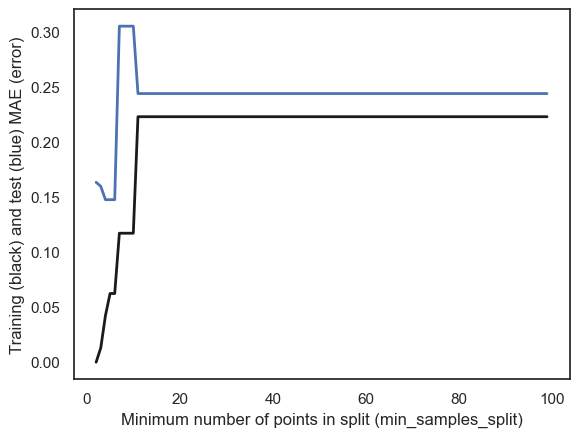

In [35]:
plt.plot(hyper_param,train_error ,linewidth=2, color='k')
plt.plot(hyper_param,test_error ,linewidth=2, color='b')

plt.xlabel("Minimum number of points in split (min_samples_split)")
plt.ylabel("Training (black) and test (blue) MAE (error)")

In [36]:
#### Re-train with optimal parameters
# INITIALIZE MODEL 
model = DecisionTreeRegressor(max_depth=1)
model.fit(x_train,y_train)                     # TRAIN MODEL 


# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

err1=mean_absolute_error(y_train, yp_train) 
err2=mean_absolute_error(y_test, yp_test) 
    
print(" train error:",err1)
print(" test error:" ,err2)

 train error: 0.11718255605998071
 test error: 0.30533009278366274


In [38]:
from sklearn import tree
def plot_tree(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                    filled=True)
    plt.show()

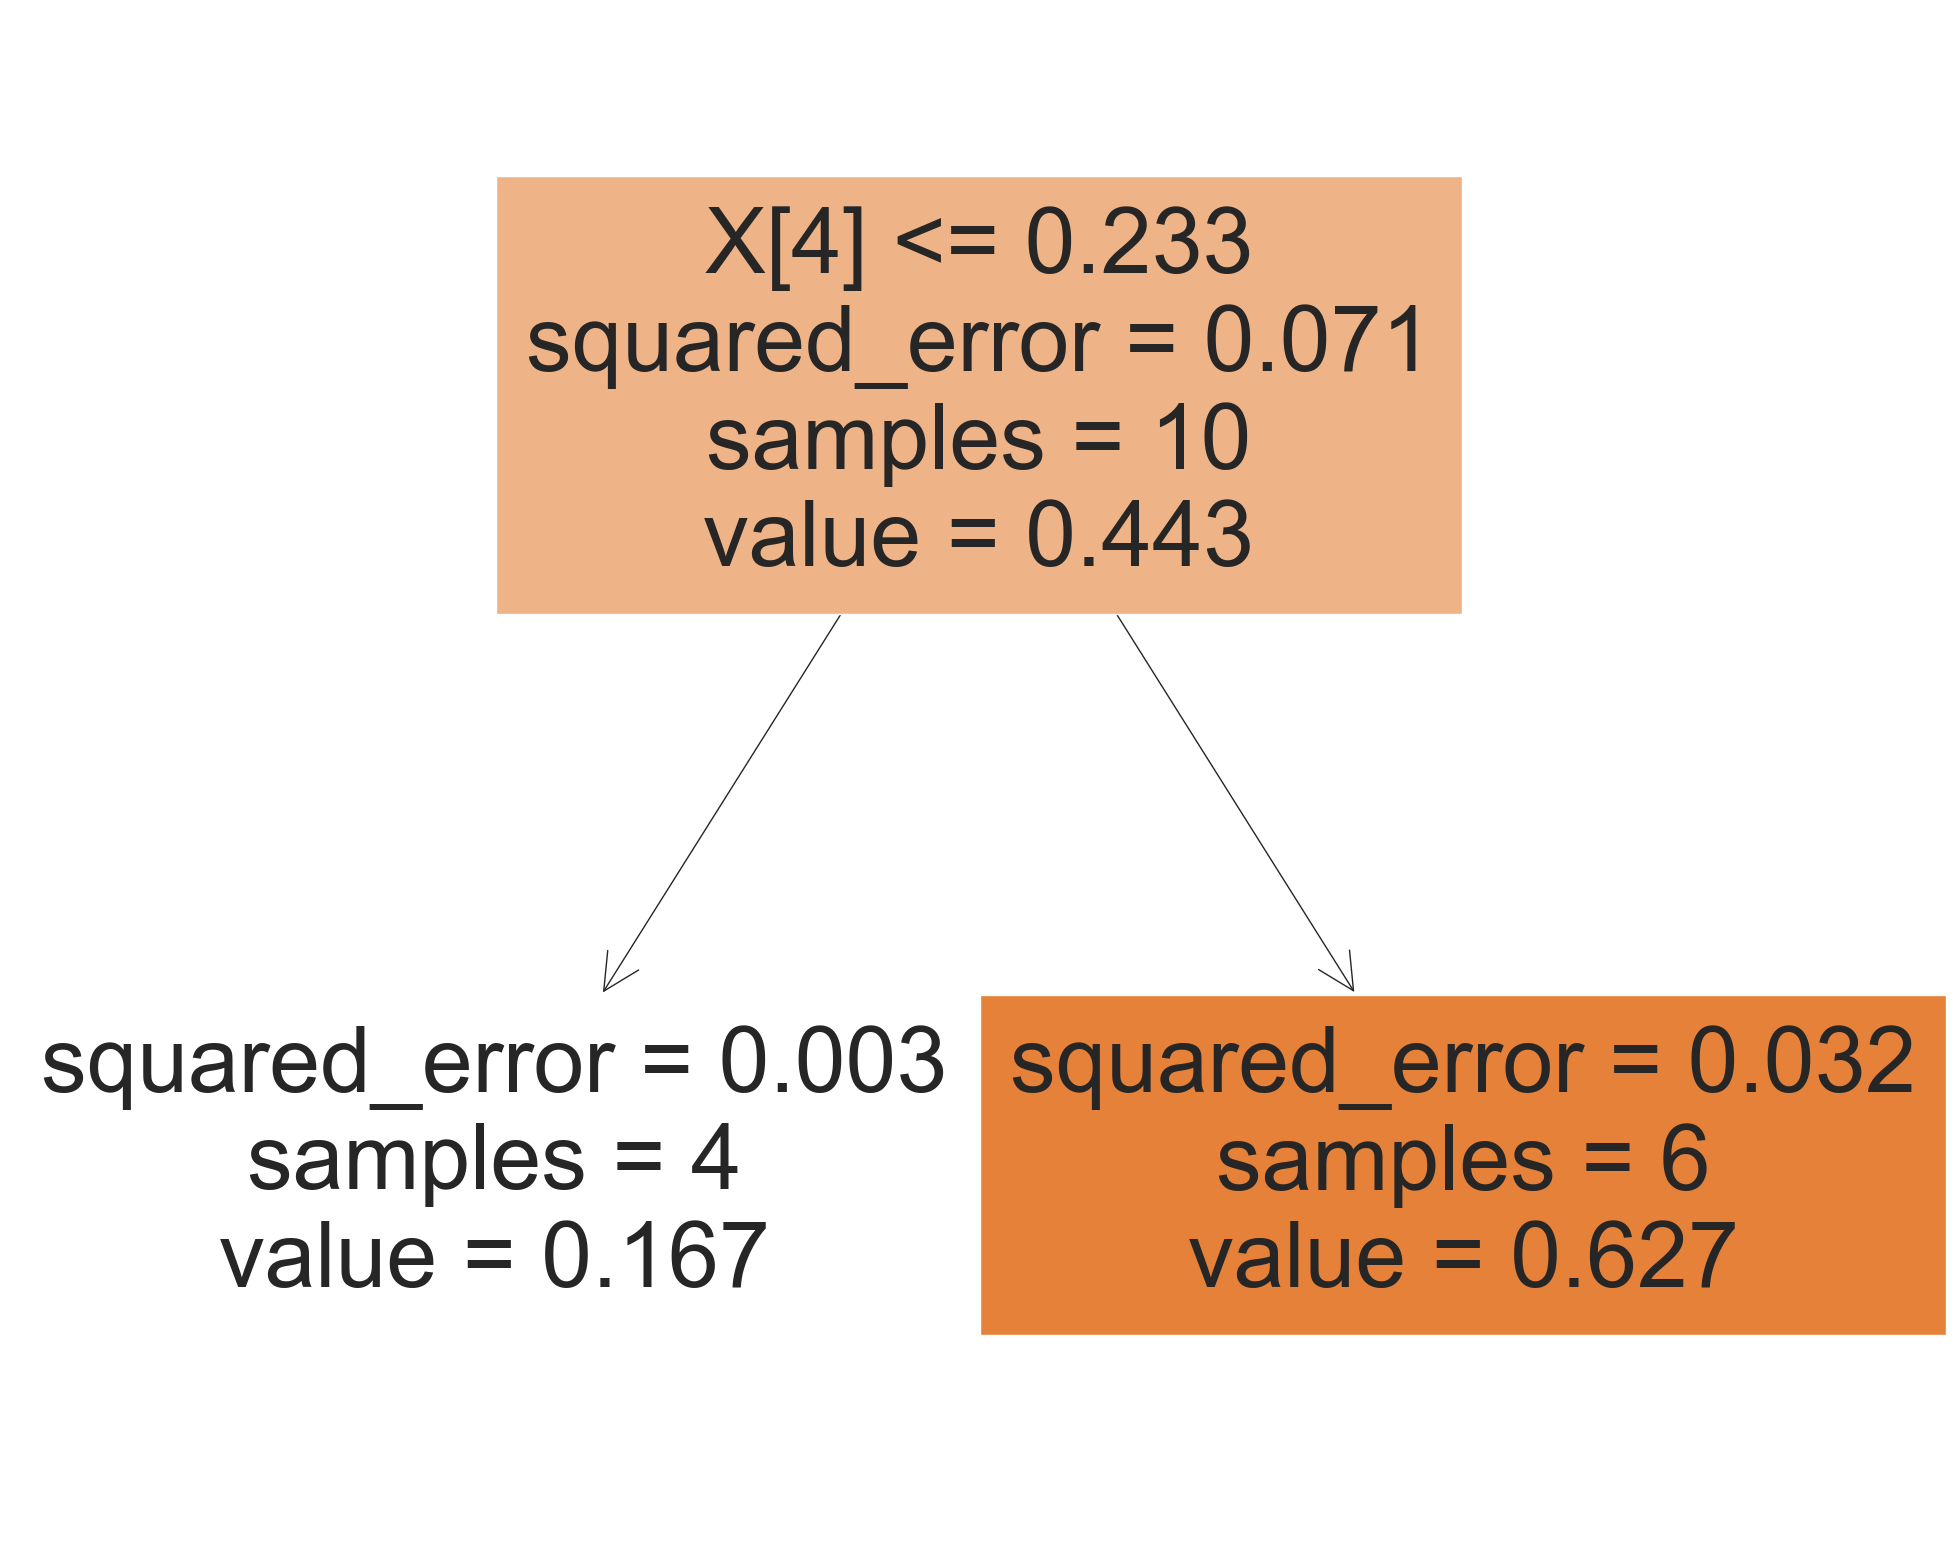

In [39]:
plot_tree(model)